In [1]:
import math
from datetime import timedelta, datetime
from operator import attrgetter

import matplotlib.pyplot as plt
import numpy as np
import trajan as ta
import xarray as xr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from scipy.io import savemat

import os
# from salishsea_tools import nc_tools, places

import cmocean.cm as cm
import copy


In [2]:
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
print (bathy.nav_lat[445, 302].values, bathy.nav_lon[445, 302].values)
print (bathy.nav_lat[445, 304].values, bathy.nav_lon[445, 304].values)
ioutfall, joutfall = 445, 304
print (bathy.Bathymetry[ioutfall, joutfall].values)
mesh = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
print (mesh.mbathy[0, ioutfall, joutfall].values)
print (mesh.gdepw_0[0, 26, ioutfall, joutfall].values)

cm_deep = copy.copy(cm.deep)
cm_deep.set_bad('k')

49.1912727355957 -123.31233978271484
49.195045471191406 -123.30195617675781
85.375
26
85.375


In [3]:
bottom_depth = mesh.gdepw_0[0, 26, ioutfall, joutfall].values

In [4]:
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/depDays/passive_particles_for_1-8-2024_run_30_days_1.0.zarr")
# data = xr.open_dataset("/ocean/gwatts/home/analysis-grace/runs/config_test/passive_particles_for_1-4-2024_run_5_days_1.0.zarr")
data = xr.open_dataset('/ocean/gwatts/home/analysis-grace/runs/yearly/passive_particles_for_1-1-2024_run_31_days_70m.zarr')
nobs = data.obs.shape[0]
ntraj = data.trajectory.shape[0]
print (nobs, ntraj)

186 744


In [5]:
data

<xarray.Dataset> Size: 6MB
Dimensions:       (trajectory: 744, obs: 186)
Coordinates:
  * obs           (obs) int32 744B 0 1 2 3 4 5 6 ... 179 180 181 182 183 184 185
  * trajectory    (trajectory) int64 6kB 0 1 2 3 4 5 ... 738 739 740 741 742 743
Data variables:
    fact          (trajectory, obs) float32 554kB ...
    lat           (trajectory, obs) float64 1MB ...
    lon           (trajectory, obs) float64 1MB ...
    release_time  (trajectory, obs) float32 554kB ...
    status        (trajectory, obs) float32 554kB ...
    time          (trajectory, obs) datetime64[ns] 1MB ...
    z             (trajectory, obs) float64 1MB ...
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        MPParticleP_statesAdvectionturb_mixCheckOutOfBoun...
    parcels_mesh:           spherical
    parcels_version:        3.1.2

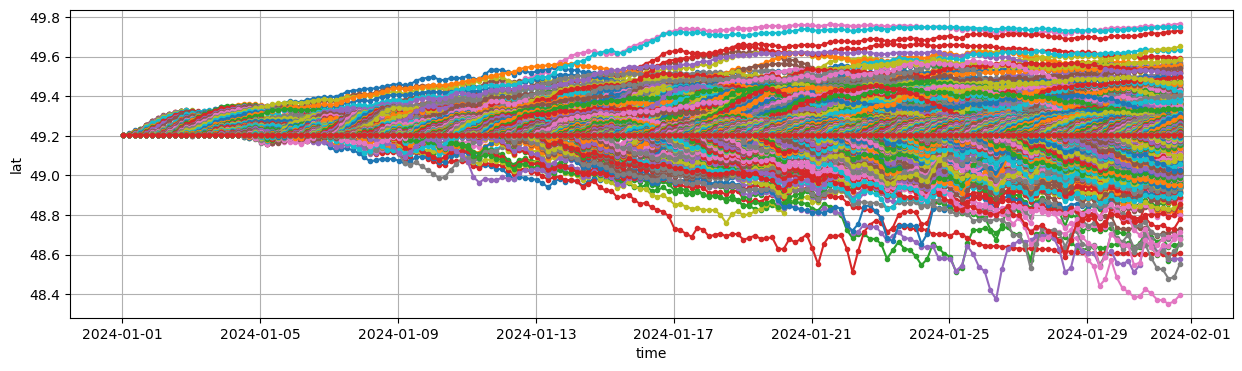

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.lat[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.set_ylabel('lat')
ax.set_xlabel('time')
ax.grid();

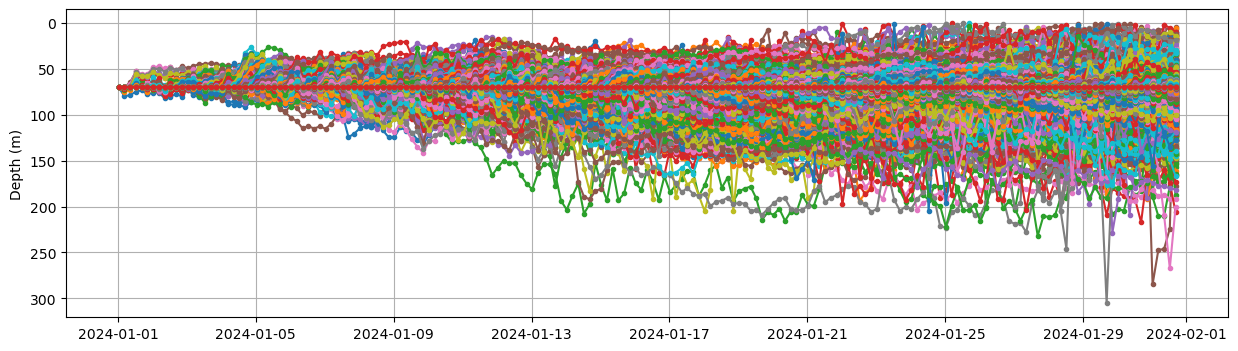

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
tend = -1
for ii in range(ntraj):
    y = data.z[ii, :tend]
    x = data.time[ii, :tend]
    ax.plot(x, y, '.-')
ax.invert_yaxis()
ax.set_ylabel('Depth (m)')
ax.grid();

/tmp/ipykernel_2239073/2391815182.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)


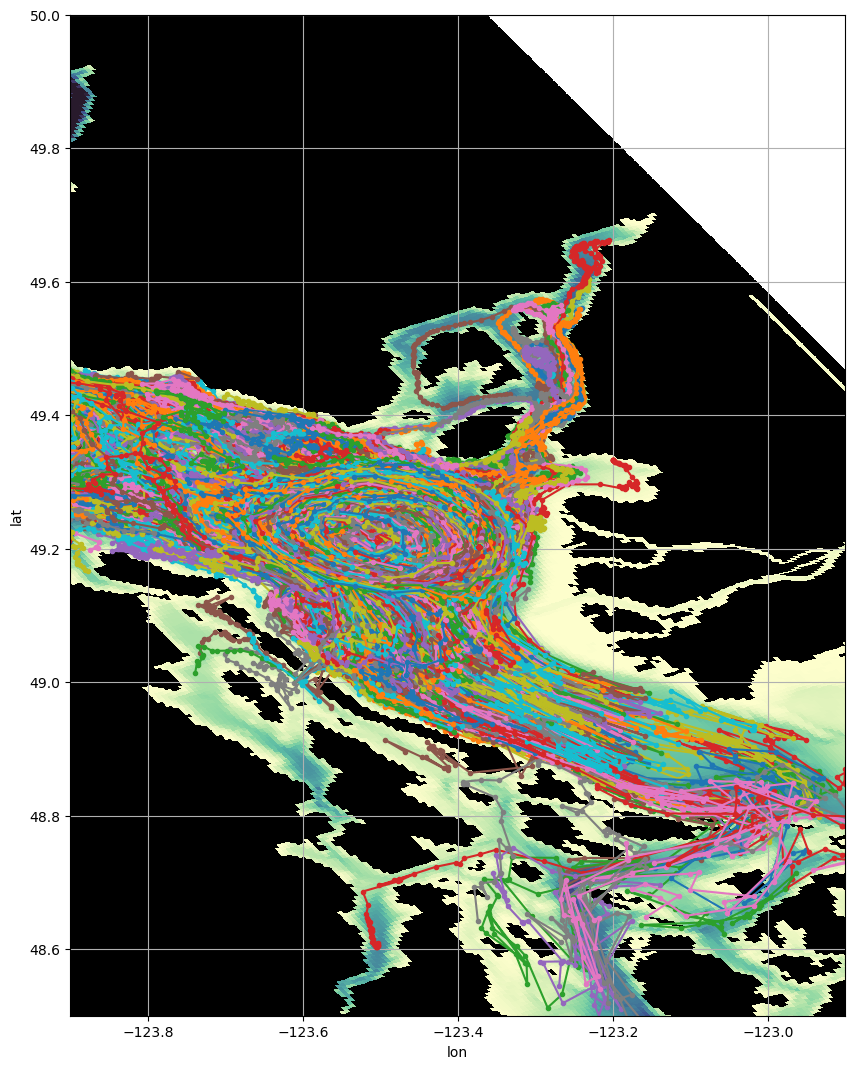

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 13))
ax.pcolormesh(bathy.nav_lon, bathy.nav_lat, bathy.Bathymetry, cmap=cm_deep)
ax.set_xlim(-123.9, -122.9)
ax.set_ylim(48.5, 50);
# 
for ii in range(ntraj):
    y = data.lat[ii]
    x = data.lon[ii]
    ax.plot(x, y, '.-')
# ax.plot(data.lat[0,0], data.lon[0,0], 'o')
ax.set_ylabel('lat')
ax.set_xlabel('lon')
ax.grid();

In [4]:
d = [50., 70., 100., 130., 160.]
np.repeat(d, 30/len(d))

array([ 50.,  50.,  50.,  50.,  50.,  50.,  70.,  70.,  70.,  70.,  70.,
        70., 100., 100., 100., 100., 100., 100., 130., 130., 130., 130.,
       130., 130., 160., 160., 160., 160., 160., 160.])

/ocean/gwatts/home/analysis-grace/runs/tidal_runs/passive_particles_for_20-1-2025_run_7_days_130m.zarr


In [2]:
dn = '/ocean/gwatts/home/analysis-grace/runs/'
# fn = 'passive_particles_for_20-1-2025_run_7_days_130m.zarr'


fn = os.listdir(dn+'yearly/')  # Includes files and folders
# # Optional: Only include files (not subfolders)
# fn = [f for f in fn if os.path.isfile(os.path.join(dn, f))]

print(fn)

for ii in range(len(fn)):
    ds = xr.open_dataset(dn+'yearly/'+fn[ii])
    # df = data.to_dataframe().reset_index()

    df = {var: ds[var].values for var in ds.data_vars}
    # savemat(fn+".mat", {"data": df.to_dict("list")})

    savemat(dn+'matfiles/yearly/'+fn[ii]+".mat", df)

# nobs = data.obs.shape[0]
# ntraj = data.trajectory.shape[0]
# print (nobs, ntraj)
# pring(df)

['passive_particles_for_1-1-2024_run_31_days_110m.zarr', 'passive_particles_for_1-1-2024_run_31_days_70m.zarr', 'passive_particles_for_1-1-2024_run_31_days_160m.zarr', 'passive_particles_for_1-2-2024_run_29_days_160m.zarr']


In [5]:
import numpy as np

release_particles_every = 86400  # seconds
ndays = 4
particles_per_group = 10

total_particles = int(ndays * 86400 / release_particles_every)
number_particles = total_particles * particles_per_group  # now total number of particles

# Create time vector where each group of 10 particles shares the same release time
group_times = np.arange(0, release_particles_every * total_particles, release_particles_every)
times = np.repeat(group_times, particles_per_group)

print(number_particles)
print(group_times)
print(times)

40
[     0  86400 172800 259200]
[     0      0      0      0      0      0      0      0      0      0
  86400  86400  86400  86400  86400  86400  86400  86400  86400  86400
 172800 172800 172800 172800 172800 172800 172800 172800 172800 172800
 259200 259200 259200 259200 259200 259200 259200 259200 259200 259200]


In [6]:
lat = -123*np.ones(number_particles)

print(lat)

[-123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123. -123.
 -123. -123. -123. -123.]
